In [ ]:
import tweepy
from tweepy import OAuthHandler
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import json

In [ ]:
consumer_key = '8eF4lZTlC8KkbjEripts8q4qN'
consumer_secret = 'uUx9x5mzRRPrb6XJM4zroNpE1d1qIYzS5FE3XTW1iV2MVjmjRU'
access_token = '98633155-EIx0qO9kqL7tmc6Zr2LxwzKKhgpf9pv6CrnOOnkTO'
access_token_secret = 'jFEP3DLliN81b2mUALaLUOcDYNu0ppgmSsYbbzBhbVpXX'

In [ ]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [ ]:
Indonesia_woe = 23424846
    
trends = api.trends_place(Indonesia_woe)
for item in (trends[0]['trends']):
       print (item['name'])

In [ ]:
search_words = "Jouska"
date_since = "2020-07-25"
new_search = search_words + " -filter:retweets"

tweets = tweepy.Cursor(api.search,tweet_mode='extended',
        q=new_search,
        lang="id",
        since=date_since).items(50)

In [ ]:
items = []
for tweet in tweets:
  item = []
  item.append (tweet.user.screen_name)
  item.append (tweet.user.location)
  item.append (' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet.full_text).split()))
  items.append(item)
hasil = pd.DataFrame(data=items, columns=['User', 'Lokasi', 'Tweet'])
hasil

In [ ]:
json_data = hasil.to_json(orient='split')

In [ ]:
parsed = json.loads(json_data)
print(json.dumps(parsed, indent=7, sort_keys=False))

{
       "User": {
              "0": "gilangbungkus",
              "1": "jouska_sweet",
              "2": "spamenanjr",
              "3": "litanara",
              "4": "litanara",
              "5": "LokadataID",
              "6": "rizqihijriah",
              "7": "luwandiko",
              "8": "AjiGunS",
              "9": "wanprestation",
              "10": "miamarifah",
              "11": "ekkynandaputra",
              "12": "KATADATAcoid",
              "13": "FarelGiffari",
              "14": "jouska_sweet",
              "15": "3ndi",
              "16": "satrioajie",
              "17": "19mei_",
              "18": "mendoanitrust",
              "19": "rheihanlfc",
              "20": "Bisniscom",
              "21": "TirtoID",
              "22": "JackalHoliday",
              "23": "ambank_mr",
              "24": "annisacan_",
              "25": "kompasiana",
              "26": "AdiGunarta13",
              "27": "irfn_xyz",
              "28": "Hmei271",
     

In [ ]:
parsed = json.loads(json_data)
print(json.dumps(parsed, indent=7, sort_keys=True))

{
       "Lokasi": {
              "0": "",
              "1": "",
              "10": "Indonesia",
              "11": "",
              "12": "Jakarta",
              "13": "Surabaya, East Java",
              "14": "",
              "15": "Ahh... around you....",
              "16": "Indonesia",
              "17": "",
              "18": "",
              "19": "Jakarta Timur, DKI Jakarta",
              "2": "Jakarta-Bandung ",
              "20": "Jakarta, Indonesia",
              "21": "Indonesia",
              "22": "Gelora Bandung Lautan Api",
              "23": "\u00dcT: 0.0,0.0",
              "24": "",
              "25": "Indonesia",
              "26": "Bali",
              "27": "Banda Aceh, Aceh",
              "28": "",
              "29": "",
              "3": "metaverse",
              "30": "Sidoarjo, East Java",
              "31": "Juwana, Indonesia",
              "32": "\u262d",
              "33": "East Java, Indonesia",
              "34": "Kota Makassar, 

In [ ]:
print(json_data)

{"User":{"0":"gilangbungkus","1":"jouska_sweet","2":"spamenanjr","3":"litanara","4":"litanara","5":"LokadataID","6":"rizqihijriah","7":"luwandiko","8":"AjiGunS","9":"wanprestation","10":"miamarifah","11":"ekkynandaputra","12":"KATADATAcoid","13":"FarelGiffari","14":"jouska_sweet","15":"3ndi","16":"satrioajie","17":"19mei_","18":"mendoanitrust","19":"rheihanlfc","20":"Bisniscom","21":"TirtoID","22":"JackalHoliday","23":"ambank_mr","24":"annisacan_","25":"kompasiana","26":"AdiGunarta13","27":"irfn_xyz","28":"Hmei271","29":"Magari_Jouska","30":"kukuh239","31":"PSNingrum","32":"ikankodd","33":"so_vintja","34":"ladazaa","35":"makmummasjid","36":"azirizky","37":"bishamonten__","38":"lordmember","39":"kacungjalanan","40":"kacungjalanan","41":"kacungjalanan","42":"kacungjalanan","43":"kacungjalanan","44":"pisangmadu","45":"Dinar13nugroho","46":"ardianofauzy","47":"ris_haswa","48":"koreisreal","49":"alyssaziya"},"Lokasi":{"0":"","1":"","2":"Jakarta-Bandung ","3":"metaverse","4":"metaverse","5":

In [ ]:
pos_list= open("kata_positif.txt","r")
pos_kata = pos_list.readlines()
neg_list= open("kata_negatif.txt","r")
neg_kata = neg_list.readlines()

S = []
for item in items:
  count_p = 0
  count_n = 0
  for kata_pos in pos_kata:
    if kata_pos.strip() in item[0]:
      count_p +=1
  for kata_neg in neg_kata:
    if kata_neg.strip() in item[0]:
      count_n +=1
  S.append(count_p - count_n)
#print ("positif: "+str(count_p))
#print ("negatif: "+str(count_n))

In [ ]:
hasil["value"] = S
print ("Nilai rata-rata: "+str(np.mean(hasil["value"])))
print ("Standar deviasi: "+str(np.std(hasil["value"])))

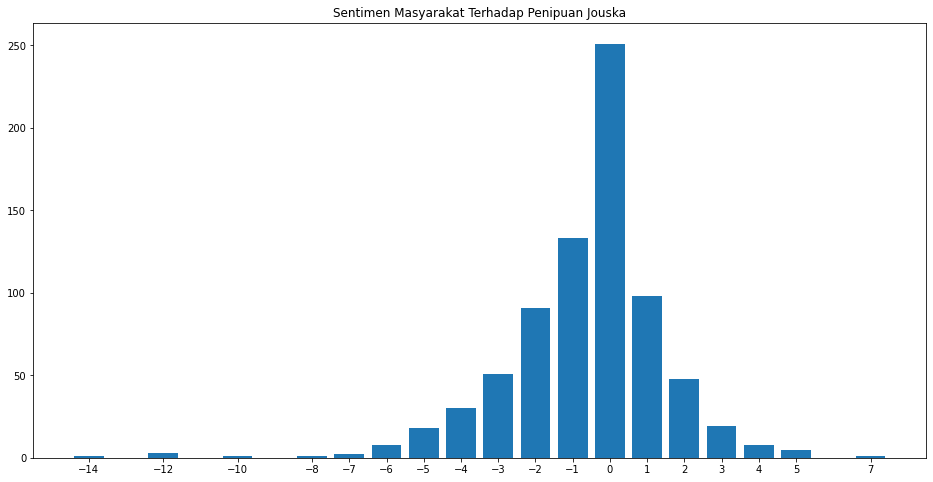

In [ ]:
labels, counts = np.unique(hasil["value"], return_counts=True)
fig, ax=plt.subplots(figsize=(16,8))
plt.title('Sentimen Masyarakat Terhadap Penipuan Jouska')
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.show()